In [1]:
# videos representativos
vid1="/home/egomezos/Documents/udea-lessons/pdi2/raw_iandertalbot_videos/video01.mp4"
vid2="/home/egomezos/Documents/udea-lessons/pdi2/raw_iandertalbot_videos/video40.mp4"

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Properties of videos (VideoCapture Properties)

In order to find details of the current video being played, some properties might help:
https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d

Some video flags:
https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html

In [53]:
cap1=cv2.VideoCapture(vid1)
fps=cap1.get(cv2.CAP_PROP_FPS)
frame_count=int(cap1.get(cv2.CAP_PROP_FRAME_COUNT))

/print fps
/print frame_count

#CURRENT FRAME POSITION 0-BASED
/print cap1.get(cv2.CAP_PROP_POS_FRAMES)
#CURRENT FRAME POSITION TIME-BASED
/print cap1.get(cv2.CAP_PROP_POS_MSEC)


w=int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h=int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
/print w
/print h
cap1.release()

15.0
161
0.0
0.0
640
480


# mejora del filtro para color específico

## obtención de imágenes de video para análisis

In [32]:
## no funciona
# tomo imágenes aleatoriamente en el video para filtrarlas
imgs=[np.zeros((w,h,3),dtype='uint8'),]*4 # 3 channels
for i,p in enumerate(np.arange(0.25,1.25,0.25)):
    imgs[i]=cap1.retrieve(imgs[i],int(p*frame_count))
cap1.release()

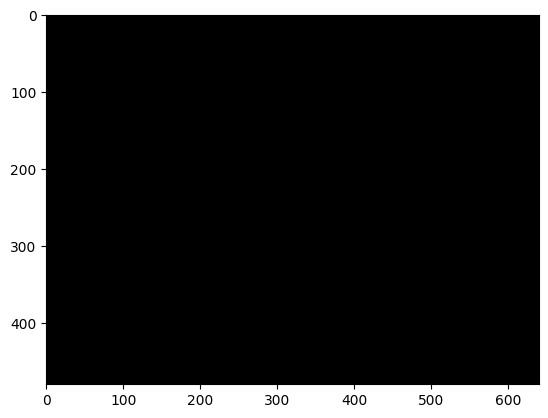

In [52]:
cap1=cv2.VideoCapture(vid1)
img=np.zeros((h,w,3),dtype='uint8') #height then width
err,img=cap1.retrieve(image=img,flag=int(0.5*frame_count))
cap1.release()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
#al parecer no funciona así

con capture.retrieve() al parecer no se puede hacer en python.

lo hago entonces con `set(cv2.CAP_PROP_POS_FRAMES,int(0.25*frame_count)` y con `read()` 

para tomar la imagen del 25%, y si quiero las demás no es sino reemplazarlo por 0.5 o por el porcentaje deseado

True


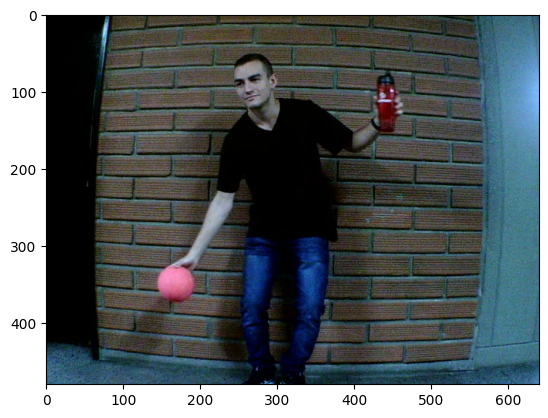

In [44]:
cap1=cv2.VideoCapture(vid1)
img=None
/print cap1.set(cv2.CAP_PROP_POS_FRAMES,int(0.5*frame_count))
err,img=cap1.read()
cap1.release()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
#al parecer funciona así

In [74]:
## funciona
cap1=cv2.VideoCapture(vid1) #importante siempre abrir y cerrar el archivo de video
# tomo imágenes aleatoriamente en el video para filtrarlas
imgs=[np.zeros((h,w,3),dtype='uint8'),]*4 # 4 pictures of 3 channels
for i,p in enumerate(np.arange(0.25,1.25,0.25)):
    err1=cap1.set(cv2.CAP_PROP_POS_FRAMES,int(p*frame_count))
    err2,imgs[i]=cap1.read()
    print(err1 and err2)
cap1.release()

True
True
True
False


In [75]:
/print imgs[-1]

None


In [76]:
#con lo anterior me doy cuenta de que no se debe utilizar el último frame

cap1=cv2.VideoCapture(vid1) #importante siempre abrir y cerrar el archivo de video
# tomo imágenes aleatoriamente en el video para filtrarlas
imgs=[np.zeros((h,w,3),dtype='uint8'),]*3 # 3 pictures of 3 channels
for i,p in enumerate(np.arange(0.25,1,0.25)):
    err1=cap1.set(cv2.CAP_PROP_POS_FRAMES,int(p*frame_count))
    err2,imgs[i]=cap1.read()
    print(err1 and err2)
cap1.release()


True
True
True


In [77]:
/print imgs[-1]

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 95  91  35]
  [102 100  37]
  [ 98  96  33]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [102  98  42]
  [113 111  48]
  [108 106  43]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [109  92  45]
  [118 101  56]
  [114  97  52]]

 ...

 [[135 105  65]
  [131 101  61]
  [116  87  49]
  ...
  [176 134  82]
  [164 128  71]
  [164 128  71]]

 [[149 104  60]
  [161 116  72]
  [144 100  62]
  ...
  [178 143  83]
  [161 134  71]
  [158 131  68]]

 [[157 112  68]
  [157 112  68]
  [151 107  69]
  ...
  [177 142  82]
  [161 134  71]
  [154 127  64]]]


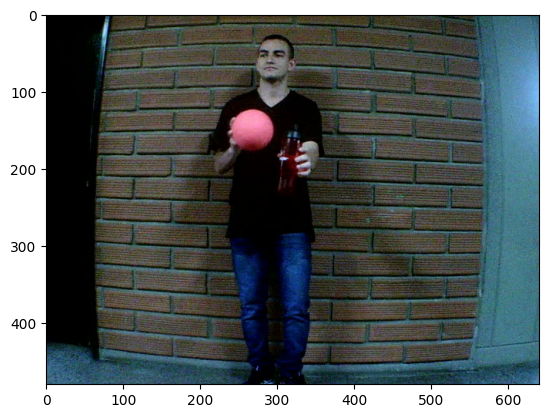

In [78]:
plt.imshow(cv2.cvtColor(imgs[-1],cv2.COLOR_BGR2RGB))

In [88]:
/print w
/print h
/print w/h
/print 16/9
/print 4/3
#frame aspect ratio
fas=w/h

640
480
1.3333333333333333
1.7777777777777777
1.3333333333333333


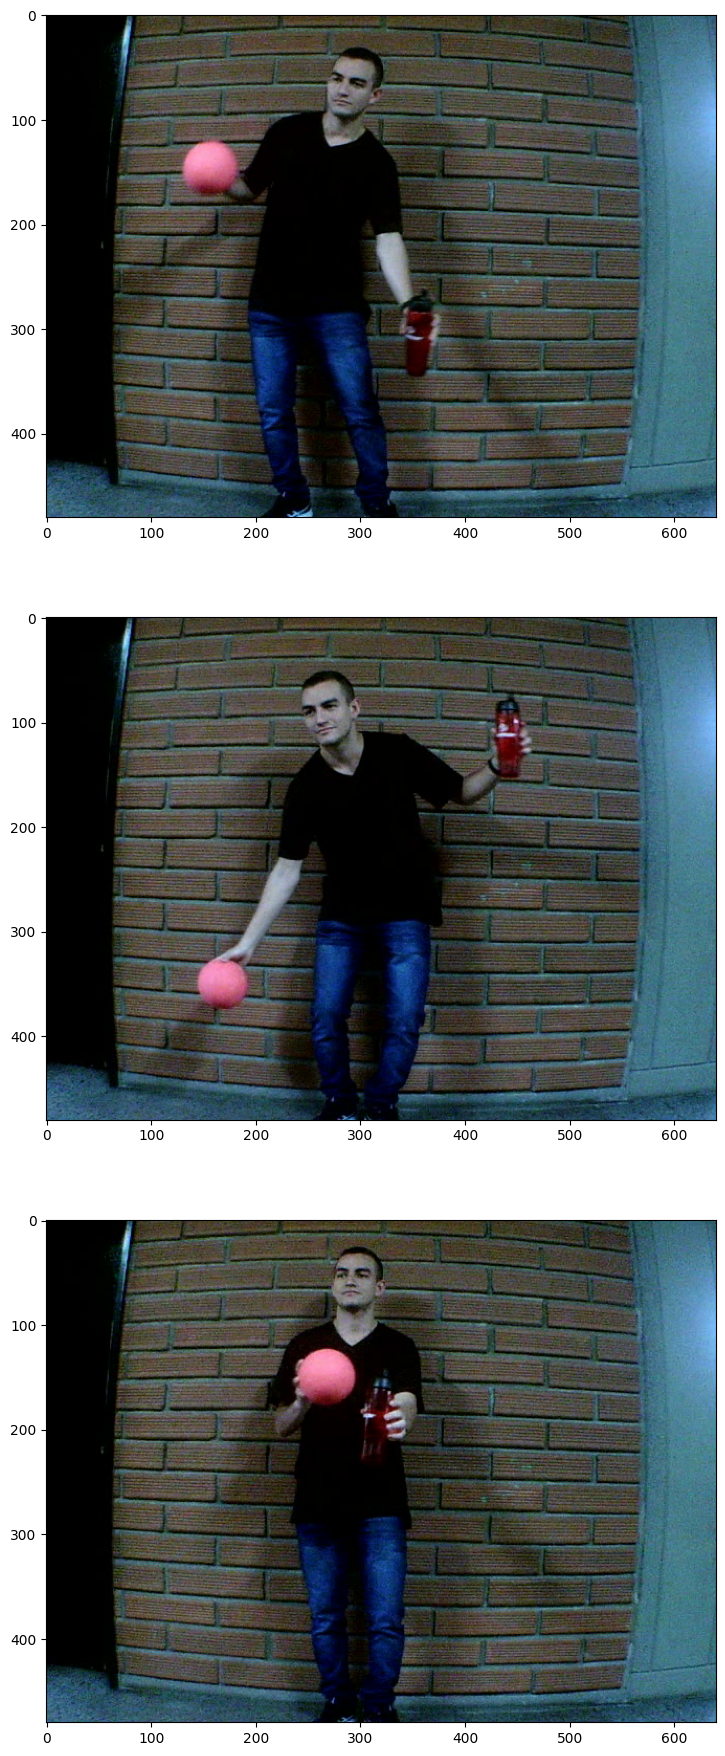

In [92]:
plt.figure(figsize=(40, 30), dpi=100)
for i,img in enumerate(imgs):
    plt.subplot(4,1,i+1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

## Filtro de la imagen